In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re 
from tqdm import tqdm

In [3]:
df = pd.read_csv("data/booking_reviews.csv")
df.head(3)

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [4]:
#Now check our review example
df["review_text"][0]

'Everything was perfect! Quite, cozy place to relax.'

In [5]:
#Check some bad reviews with rating score equal 2
with pd.option_context('display.max_colwidth', None):
    display(df[df["rating"] == 2][:3]["review_text"])

147     We knew there was no breakfast, but they could have made a little effort providing a kettle and two cups for some instant coffee in the morning. They changed the sheets only once in the week. Towels were changed every day, but some were really old and thin. Plastic glasses were provided only twice. The shower floor was terribly slippery and slopy. Pillows were awful, my neck is still complaining. And last but not least, we had to pay as we arrived, in advance, the very first evening.,\n\nThe wifi conexión and the air-co.
2517                                                                                                                                                                                                                                            Bed bugs were found in the room (live ones). The staff took time to admit that the hotel had been treated weeks before, despite the strong smell of chemical products.\n3 months after, I am still waiting for the reimbursement 

#### Now we will clean our dataset and keep only columns of interest which we will analyse

In [6]:
df2 = df[["review_title","review_text","rating"]]
df2.head(3)

,review_title,review_text,rating
0,Exceptional,"Everything was perfect! Quite, cozy place to r...",10.0
1,I highly recommend this b&b! We enjoyed it a lot!,Very friendly host and perfect breakfast!,9.0
2,Exceptional,It was just what we wanted for a week by the b...,10.0


In [7]:
#Here we check our ratings and counts them
df2["rating"].value_counts()

rating
10.0    7433
9.6     2463
9.0     2319
8.0     2086
9.2     2050
8.8     1538
8.3     1393
7.5     1242
7.9     1141
7.0      907
7.1      735
6.7      512
6.3      400
5.0      384
6.0      305
5.8      294
5.4      228
4.6      162
4.0      104
4.2      101
1.0       95
3.8       81
3.0       78
3.3       67
9.5       57
2.5       55
2.0       44
2.9       40
8.5       33
5.5       12
6.5       10
9.4        8
4.5        6
8.1        1
3.5        1
6.9        1
Name: count, dtype: int64

In [8]:
#We got an error becuase some of hotels are not rated. Here we count NaN values in the 'rating' column
#df2["rating"].isna().sum()
# Drop rows with any NaN values in the DataFrame
df2 = df2.dropna()

In [9]:
print(df.shape)
#Check shape again to see if they are eliminated
print(df2.shape)

(26675, 16)
(26385, 3)


Text(0, 0.5, 'Counts')

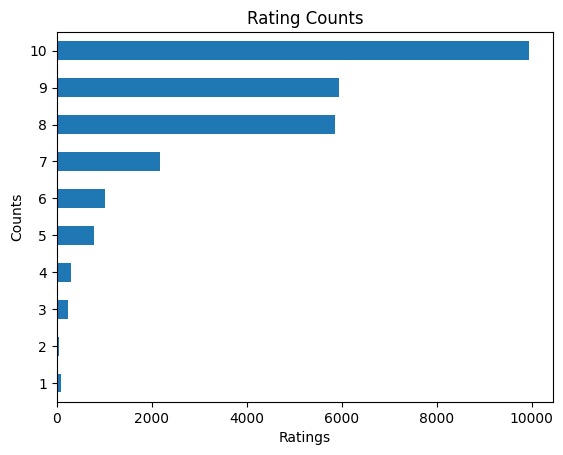

In [10]:
#We want to round our ratings on whole numbers to have scores 1,2,3...10 
#When we plot it we can see that most our comments are positive reviews
df2["rating"] = df2["rating"].apply(lambda x:int(x) if x % 1 < 0.5 else int(x)+1)
rating_counts = df2["rating"].value_counts()
rating_counts.sort_index().plot(kind='barh')
plt.title("Rating Counts")
plt.xlabel("Ratings")
plt.ylabel("Counts") 

In [11]:
#Same as ratings we can also see that most of our review_titles are positive feebacks
df2.groupby("review_title").count().sort_values("rating",ascending=False).head(20)

,review_text,rating
review_title,,
Exceptional,5975,5975
Good,2745,2745
Superb,2662,2662
Very good,2310,2310
Fabulous,1013,1013
Pleasant,817,817
Passable,376,376
Disappointing,224,224
Okay,192,192


In [12]:
#We will combine our two variables, review_title and review_text into one variable, final_review 
df2["final_review"] = df2.review_title+"."+df2.review_text
df3 = df2.drop(columns=["review_title","review_text"])
order=["final_review","rating"]
df3 = df3.reindex(columns=order)
df3.head(3)

,final_review,rating
0,"Exceptional.Everything was perfect! Quite, coz...",10
1,I highly recommend this b&b! We enjoyed it a l...,9
2,Exceptional.It was just what we wanted for a w...,10


#### Text preprocessing

In [13]:
#We convert final_review to lowercase and also delete whitespaces 
df3["final_review"] = df3["final_review"].map(lambda x:x.lower()) 
df3["final_review"] = df3["final_review"].map(lambda x:x.strip()) 
df3["final_review"] = df3["final_review"].map(lambda x:" ".join(x.split()))

#We also remopve uninformative pieces of text 
df3["final_review"] = df3["final_review"].map(lambda x:re.sub(r'\@\w+|\#','', x))
df3.head()

,final_review,rating
0,"exceptional.everything was perfect! quite, coz...",10
1,i highly recommend this b&b! we enjoyed it a l...,9
2,exceptional.it was just what we wanted for a w...,10
3,my stay in the house was a experiencing bliss ...,10
4,one bedroom apartment with wonderful view and ...,9


In [14]:
#We will also use nltk to remove stop words that are unnecessery for our model understanding and sentiment analysis 
import nltk 
from nltk.corpus import stopwords  

nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 
df3["final_review"] = df3["final_review"].map(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Modeling

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_absolute_error

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vuk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
vader_score=[] 
for i in tqdm(df3.final_review):
    vader_score.append(analyser.polarity_scores(i)['compound'])
df3['vader_score'] = vader_score

100%|██████████| 26385/26385 [00:07<00:00, 3571.36it/s]


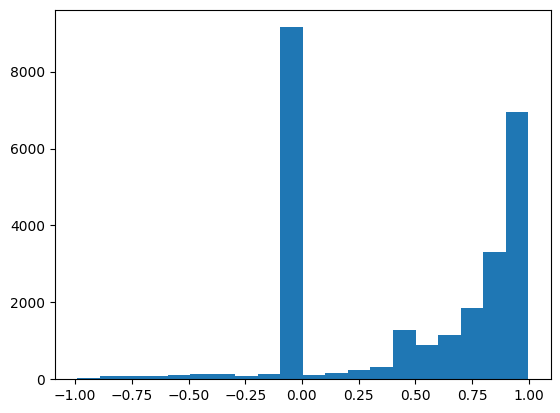

In [17]:
#If we plot our vaderscores most of scores are close to +1 indicate positive statements but we also get pick around score 0.0 that suggest neutral statements
plt.hist(df3.vader_score,bins=20)
plt.show()

As we can see, the initial dataset doesn't provide information whether specific review is positive, neutral or negative. We could make our own variable built based on the rating variable, but another problem would occur:

How to define the rating values for which the review is "positive"?

Do we have to split the range equally, where negative is 1-3.33, neutral is 3.33-6.66 and positive is 6.66-10?

Or do we have to use the range like NPS metric, where the negative values are 1-6, neural are 7-8 and negative are 9-10?

But we can just make the regression problem out of it instead of classification problem.

Let's try to predict the rating the user will leave and use the MAE metric. With vader_score+1 we shift the range from [−1, +1] to [0, +2] and by multiplying with 5, scales the range [0, +2] to a range of [0, 10]

predicted_rating = (vader_score + 1) * 5

In [18]:
df3 = df3.assign(pred_rating= lambda x: (x.vader_score+1)*5)
#or map just one column using df3['pred_rating'] = df3['vader_score'].map(lambda x: (x + 1) * 5)

In [19]:
#As we can see, our approach on average have an error of 2.1 rating points
print(f"MAE: {mean_absolute_error(df3.rating, df3.pred_rating)}")

MAE: 2.098980860337313


In [20]:
#Now we will check for which reviews we had greates error
error_examine = df3.assign(abs_error=lambda x:abs(x.rating-x.pred_rating)).sort_values("abs_error",ascending=False).reset_index(drop=True) 
error_examine.head(10)

,final_review,rating,vader_score,pred_rating,abs_error
0,"exceptional.there nothing like , great apartme...",10,-0.8270,0.8650,9.1350
1,3 star hotel.the elevator used also cleaning l...,1,0.9202,9.6010,8.6010
2,"people rude, mean like ""american's""; rooms col...",1,0.9168,9.5840,8.5840
3,exceptional.the toilet strange smell. window/f...,10,-0.6800,1.6000,8.4000
4,"nothing extraordinary, great breakfast awful s...",9,-0.8775,0.6125,8.3875
5,spacious convenient duplex right heart old tow...,10,-0.6486,1.7570,8.2430
6,exceptional.nothing complain really. maybe bit...,10,-0.6444,1.7780,8.2220
7,"avoid place! never, ever again!.let's start be...",1,0.8438,9.2190,8.2190
8,exceptional.its little old thats bad thing. pr...,10,-0.6412,1.7940,8.2060
9,monasterium?.why chose hotel (and pay higher r...,1,0.8402,9.2010,8.2010


In [21]:
#Here we check full review
with pd.option_context('display.max_colwidth', None):
    display(error_examine[error_examine["abs_error"] > 8][:5])

,final_review,rating,vader_score,pred_rating,abs_error
0,"exceptional.there nothing like , great apartment, spacious, great facilities",10,-0.8270,0.8650,9.1350
1,"3 star hotel.the elevator used also cleaning ladies, arrived hotel wait 15 minutes order able take elevator. stayed 4th floor room cold, heater barely warm request extra portable heater. furniture neither new neither maintained properly. paint entire room niked. curtain broken place place. windows close properly hear everything outside. one nights another client/s smoked hallway much point smell also entering room. smell perssisted next day. , staff super helpful try solve issues best can. breakfast good. multiple ways getting area city bruxelles midi train station 15 minutes away.",1,0.9202,9.6010,8.6010
2,"people rude, mean like ""american's""; rooms cold; hotel disrepair.i like curt staff. like restaurant open supposed to. like room cold heater work. like said would credit back card checked-out., like anything hotel!",1,0.9168,9.5840,8.5840
3,"exceptional.the toilet strange smell. window/french balcony railing beware travel children., modern design, parking available. everything expectations! close everything via metro. excruciating back pain bed helping lot, following day better. next time i'll brussels first option stay.",10,-0.6800,1.6000,8.4000
4,"nothing extraordinary, great breakfast awful showers.omg bathroom confusing. 2 showers floor horrible, regulate temperature, scattered everywhere, keep pressing button door even close properly. also, shelf bathroom push soap/shampoo., loved breakfast, bed, size bedroom (4 beds, female), great size lockers fact shelf bed.",9,-0.8775,0.6125,8.3875


For the purpose of visualisation, let's assign the three tags to each review: positive, neutral or negative.

Scale:

Neutral -0.5 < and > 0.5

positive >=0.5

negative <=-0.5

In [22]:
def scale_vader(x):
    if x <= -0.5:
        return "negative" 
    elif x >= 0.5:
        return "positive" 
    else:
        return "neutral"

In [23]:
df3["sentiment"] = df3.vader_score.apply(scale_vader) 
df3.head()

,final_review,rating,vader_score,pred_rating,sentiment
0,"exceptional.everything perfect! quite, cozy pl...",10,0.7995,8.9975,positive
1,highly recommend b&b! enjoyed lot!.very friend...,9,0.9341,9.6705,positive
2,"exceptional.it wanted week beach winter, locat...",10,0.6908,8.4540,positive
3,stay house experiencing bliss luxury. house sh...,10,0.9810,9.9050,positive
4,"one bedroom apartment wonderful view free, sec...",9,0.9783,9.8915,positive


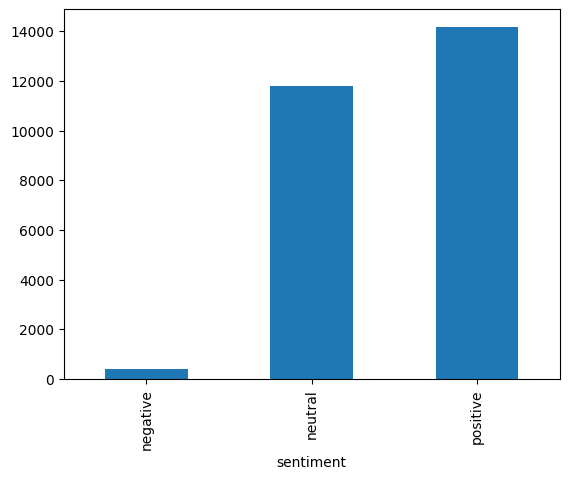

In [24]:
df3.groupby('sentiment').size().plot(kind="bar")
plt.show()

Downbellow we will separate most frequent words from positive and negative reviews first  based on our sentiment scores and later based on viewers ratings

We will graph them using WordCloud library where size of representation of each word corespon to frequence of that word in negative or positive reviews

In [25]:
from wordcloud import WordCloud, STOPWORDS

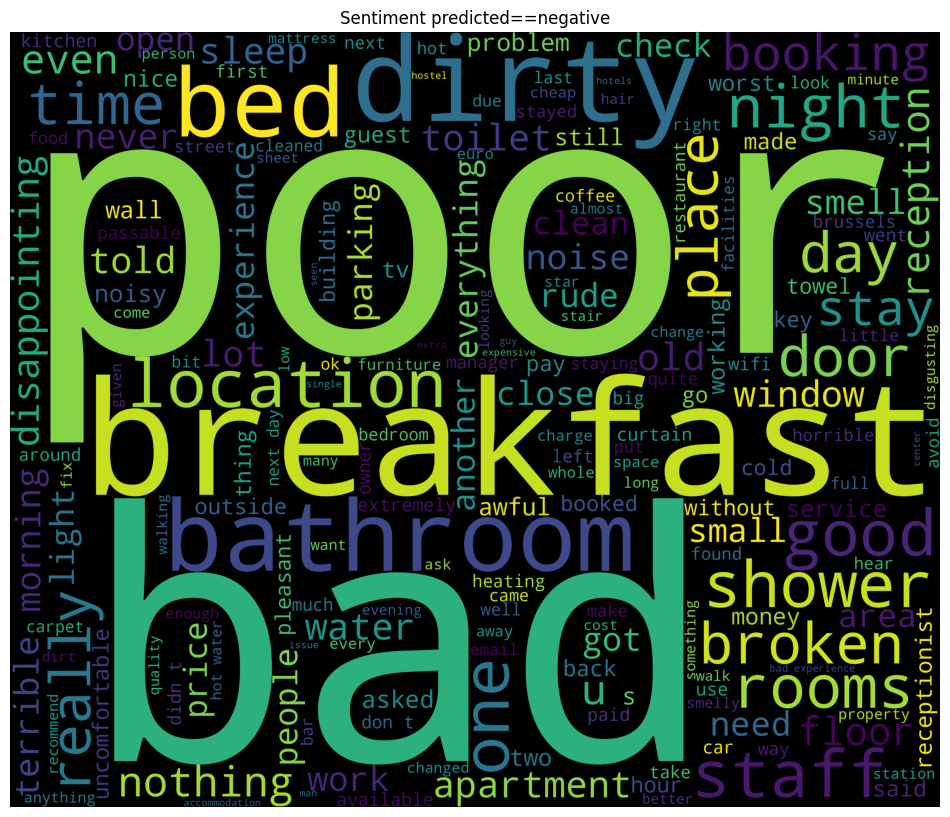

In [26]:
df_wc = df3[df3["sentiment"]=="negative"] 
words = ' '.join(df_wc['final_review']) 
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS) 
stopwords.add("hotel")
stopwords.add("room") 

wordcloud=WordCloud(stopwords=stopwords,
                   background_color='black',
                   width=3000,
                   height=2500).generate(cleaned_word) 
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud) 
plt.title("Sentiment predicted==negative")
plt.axis('off') 
plt.show()

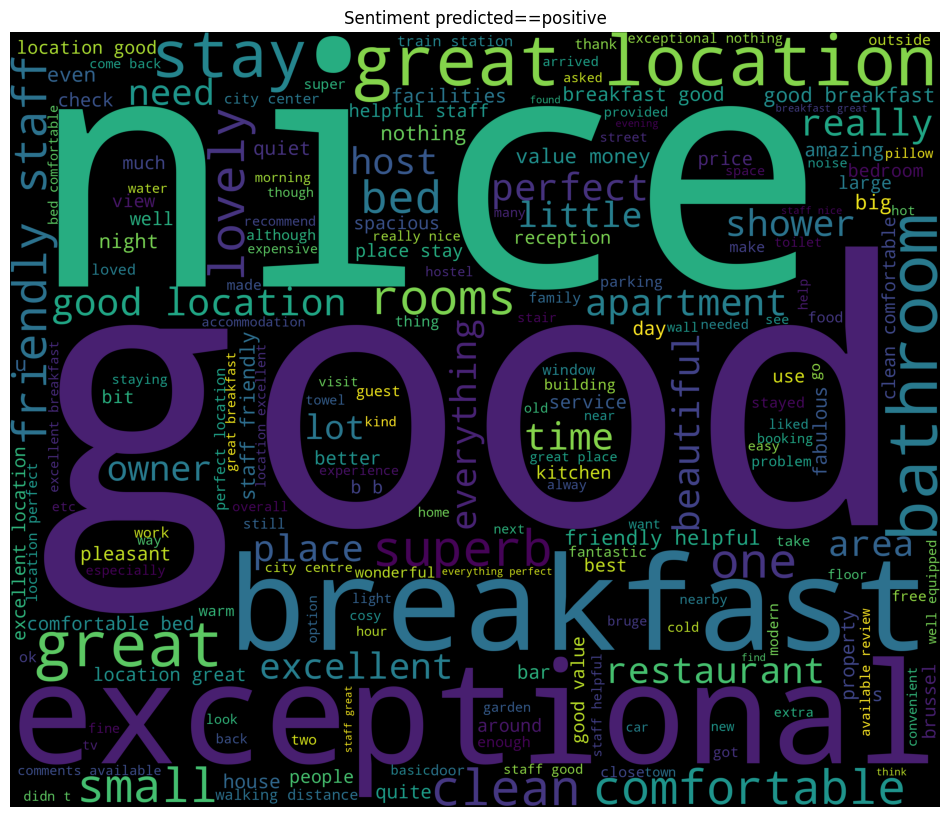

In [27]:
df_wc = df3[df3["sentiment"]=="positive"] 
words = ' '.join(df_wc['final_review']) 
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS) 
stopwords.add("hotel")
stopwords.add("room") 

wordcloud=WordCloud(stopwords=stopwords,
                   background_color='black',
                   width=3000,
                   height=2500).generate(cleaned_word) 
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud) 
plt.title("Sentiment predicted==positive")
plt.axis('off') 
plt.show()

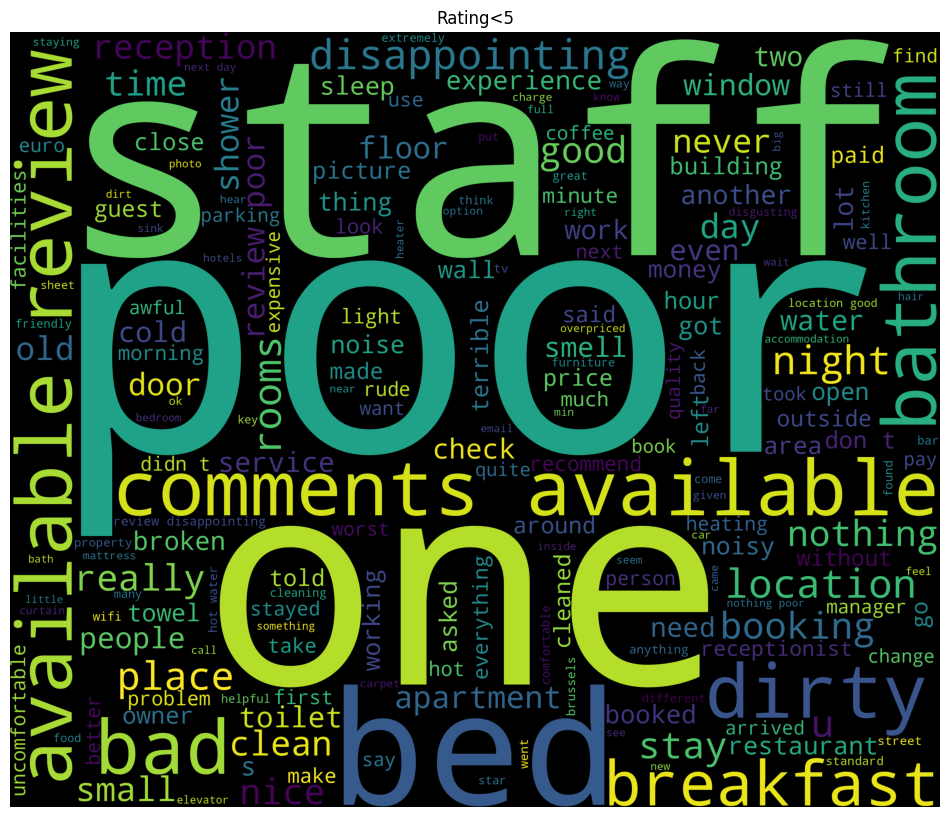

In [28]:
df_wc = df3[df3["rating"]<5] 
words = ' '.join(df_wc['final_review']) 
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS) 
stopwords.add("hotel")
stopwords.add("room") 

wordcloud=WordCloud(stopwords=stopwords,
                   background_color='black',
                   width=3000,
                   height=2500).generate(cleaned_word) 
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud) 
plt.title("Rating<5")
plt.axis('off') 
plt.show()

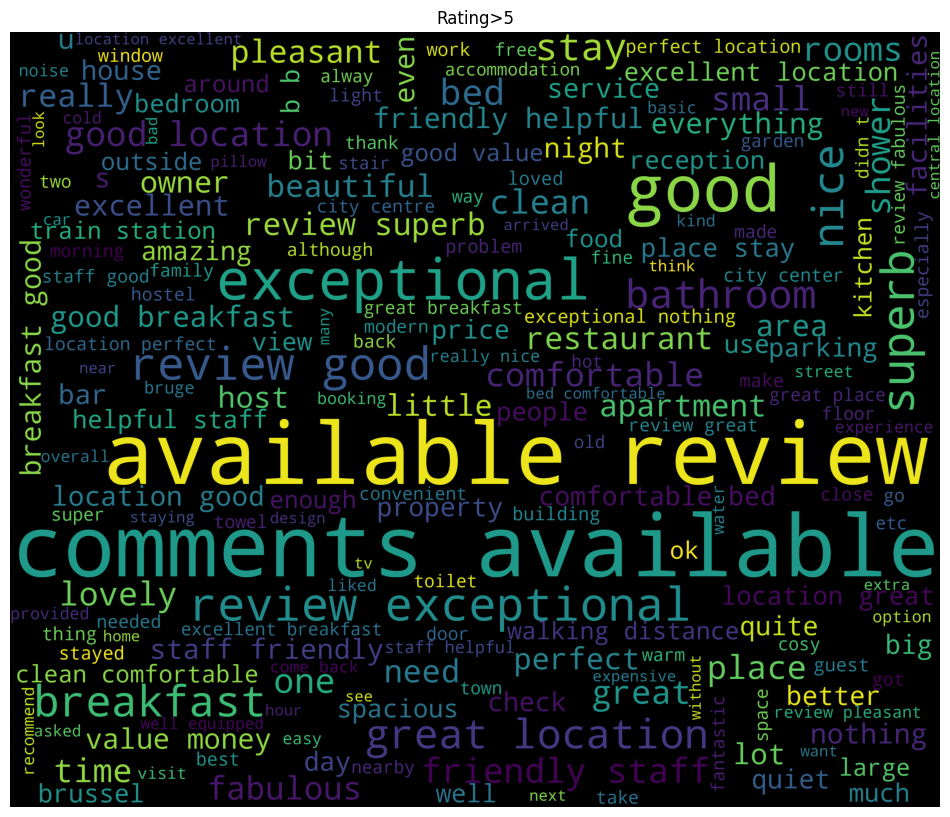

In [29]:
df_wc = df3[df3["rating"]>5] 
words = ' '.join(df_wc['final_review']) 
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS) 
stopwords.add("hotel")
stopwords.add("room") 

wordcloud=WordCloud(stopwords=stopwords,
                   background_color='black',
                   width=3000,
                   height=2500).generate(cleaned_word) 
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud) 
plt.title("Rating>5")
plt.axis('off') 
plt.show()

## Downbellow we will try to improve our predictions using PyTorch and custom model we will create

Regarding that locally I have CPU and model training would take much time, I trained model for 1000 epoch on GPU using Google Colab
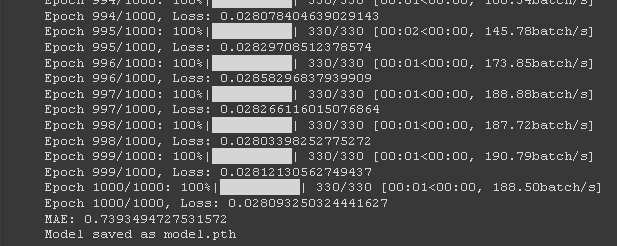

In [ ]:
#Downbellow is whole code

import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Custom Dataset using preprocessed data
class BookingReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# Load your actual dataframe
df = pd.read_csv("booking_reviews.csv")

# Preprocess the DataFrame
df2 = df[["review_title", "review_text", "rating"]]
df2 = df2.dropna()
df2["rating"] = df2["rating"].apply(lambda x: int(x) if x % 1 < 0.5 else int(x) + 1)
df2["final_review"] = df2.review_title + "." + df2.review_text
df3 = df2.drop(columns=["review_title", "review_text"])

# Train-test split
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

# Initialize the Bag-of-Words vectorizer and fit on the training data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['final_review']).toarray()  # Fit on train
X_test = vectorizer.transform(test_df['final_review']).toarray()        # Transform test with the same vectorizer

# Extract target values
y_train = train_df['rating'].values
y_test = test_df['rating'].values

# Initialize the training dataset
train_dataset = BookingReviewDataset(X_train, y_train)

# Initialize the test dataset
test_dataset = BookingReviewDataset(X_test, y_test)

# Use DataLoader to manage batching
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network model
class BoWModel(nn.Module):
    def __init__(self, input_dim):
        super(BoWModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model and move it to the device (GPU/CPU)
input_dim = X_train.shape[1]  # The number of BoW features
model = BoWModel(input_dim).to(device)

# Training loop
criterion = nn.MSELoss()  # Since we're predicting ratings, MSELoss is used
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 1000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)  # Move inputs and targets to GPU/CPU

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()  # Predict ratings
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_dataloader)}")

# Evaluation on the test set
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for batch in test_dataloader:
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)  # Move inputs and targets to GPU/CPU
        
        outputs = model(inputs).squeeze()  # Predict ratings
        
        test_preds.extend(outputs.cpu().tolist())  # Move outputs back to CPU before converting to list
        test_actuals.extend(targets.cpu().tolist())  # Move targets back to CPU

# Compute MAE (mean absolute error) for comparison
mae = mean_absolute_error(test_actuals, test_preds)
print(f"MAE: {mae}")

# Save the trained model state dict
torch.save(model.state_dict(), 'model.pth')
print("Model saved as model.pth")


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv("data/booking_reviews.csv")

# Preprocess the DataFrame
df2 = df[["review_title", "review_text", "rating"]]
df2 = df2.dropna()
df2["rating"] = df2["rating"].apply(lambda x: int(x) if x % 1 < 0.5 else int(x) + 1)
df2["final_review"] = df2.review_title + "." + df2.review_text
df3 = df2.drop(columns=["review_title", "review_text"])

# Train-test split
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

# Initialize the Bag-of-Words vectorizer and fit on the training data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['final_review']).toarray()

In [31]:
X_train.shape[1]

14124

In [32]:
#Now we can load model that we trained and downloaded from google colab

import torch
import torch.nn as nn

# Define the model architecture (same as during training)
class BoWModel(nn.Module):
    def __init__(self, input_dim):
        super(BoWModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the saved model
input_dim = X_train.shape[1]
model = BoWModel(input_dim)

# Load the trained model weights
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))

# Set the model to evaluation mode (since you're going to use it for inference)
model.eval()

# Move model to device (GPU/CPU)
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)

# Now the model is loaded and ready for inference!


BoWModel(
  (fc1): Linear(in_features=14124, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [33]:
import torch

# Define a function for predicting the rating of a new review
def predict_review_rating(review_title, review_text, model, vectorizer):
    """
    Predicts the rating of a hotel review.
    
    Args:
        review_title (str): Title of the review.
        review_text (str): Text of the review.
        model (torch.nn.Module): The trained model for rating prediction.
        vectorizer (CountVectorizer): Trained CountVectorizer for vectorizing text.
    
    Returns:
        float: The predicted rating rounded to the nearest integer.
    """
    # Concatenate the title and text to form the final review (same as done during training)
    new_review = review_title + "." + review_text
    
    # Vectorize the new review using the trained CountVectorizer
    new_review_vector = vectorizer.transform([new_review]).toarray()
    
    # Convert the vector to a tensor
    new_review_tensor = torch.tensor(new_review_vector, dtype=torch.float32)
    
    # Ensure the model is in eval mode
    model.eval()

    # Predict the rating
    with torch.no_grad():
        prediction = model(new_review_tensor)
        predicted_rating = prediction.item()
    
    # Return the rounded predicted rating
    return round(predicted_rating)

# Example usage:
new_review_title = "Amazing hotel experience"
new_review_text = "The rooms were clean and the staff was very friendly. Highly recommended!"

predicted_rating = predict_review_rating(new_review_title, new_review_text, model, vectorizer)
print(f"Predicted Rating: {predicted_rating}")




Predicted Rating: 10


In [34]:
#Try harder example 
new_review_title = "Seems ok"
new_review_text = "It was ok for the price we paid. We expected rooms to be cleaner but, I mean it was clean first day but they did not changed our towels. The rest was great. Everything is close to the apartment nad they have a nice kitchen." 
predicted_rating = predict_review_rating(new_review_title,new_review_text,model,vectorizer)
print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 5


### Now we  will try ti imrpove even more using LSTM 

#Here is MAE after 1000 epoch training with LSTM 
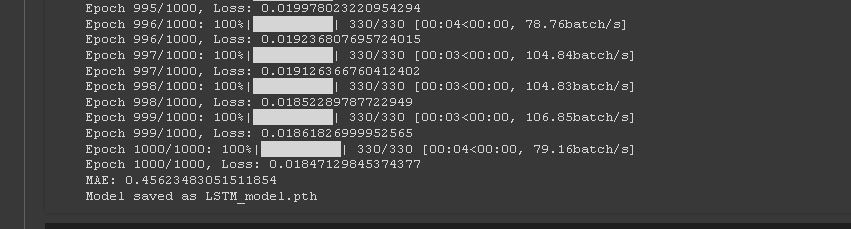

In [ ]:
#Downbellow is full code that was run on GoogleColab GPU
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import pickle

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Tokenizer and Vocabulary Builder
tokenizer = get_tokenizer("basic_english")

# Build a vocabulary from the training dataset
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# Custom Dataset using tokenized data for LSTM
class BookingReviewDataset(Dataset):
    def __init__(self, df, vocab, tokenizer):
        self.reviews = df['final_review'].tolist()
        self.ratings = df['rating'].tolist()
        self.vocab = vocab
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        tokenized = [self.vocab[token] for token in self.tokenizer(self.reviews[idx])]
        rating = self.ratings[idx]
        return torch.tensor(tokenized, dtype=torch.long), torch.tensor(rating, dtype=torch.float32)

# Collate function to pad sequences and handle inputs/targets
def collate_batch(batch):
    tokenized_reviews = [item[0] for item in batch]
    ratings = torch.tensor([item[1] for item in batch], dtype=torch.float32)
    
    # Pad sequences for uniform length
    tokenized_reviews_padded = nn.utils.rnn.pad_sequence(tokenized_reviews, batch_first=True, padding_value=0)
    
    return tokenized_reviews_padded, ratings

# Load your actual dataframe
df = pd.read_csv("booking_reviews.csv")

# Preprocess the DataFrame
df2 = df[["review_title", "review_text", "rating"]]
df2 = df2.dropna()
df2["rating"] = df2["rating"].apply(lambda x: int(x) if x % 1 < 0.5 else int(x) + 1)
df2["final_review"] = df2.review_title + "." + df2.review_text
df3 = df2.drop(columns=["review_title", "review_text"])

# Train-test split
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

# Build the vocabulary from the training data
vocab = build_vocab_from_iterator(yield_tokens(train_df['final_review']), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Initialize the training dataset
train_dataset = BookingReviewDataset(train_df, vocab, tokenizer)

# Initialize the test dataset
test_dataset = BookingReviewDataset(test_df, vocab, tokenizer)

# Use DataLoader to manage batching
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_batch)

# Define the LSTM-based model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)  # Convert tokens to embeddings
        lstm_out, (hidden, cell) = self.lstm(embedded)  # Pass through LSTM
        output = self.fc(hidden[-1])  # Use the last hidden state for prediction
        return output

# Initialize the model and move it to the device (GPU/CPU)
vocab_size = len(vocab)
embedding_dim = 100  # Dimension of word embeddings
hidden_dim = 64  # LSTM hidden dimension
output_dim = 1  # Predicting a single rating

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim).to(device)

# Training loop
criterion = nn.MSELoss()  # Since we're predicting ratings, MSELoss is used
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 1000
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for inputs, targets in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        inputs, targets = inputs.to(device), targets.to(device)  # Move inputs and targets to GPU/CPU

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()  # Predict ratings
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_dataloader)}")

# Evaluation on the test set
model.eval()
test_preds = []
test_actuals = []
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move inputs and targets to GPU/CPU
        
        outputs = model(inputs).squeeze()  # Predict ratings
        
        test_preds.extend(outputs.cpu().tolist())  # Move outputs back to CPU before converting to list
        test_actuals.extend(targets.cpu().tolist())  # Move targets back to CPU

# Compute MAE (mean absolute error) for comparison
mae = mean_absolute_error(test_actuals, test_preds)
print(f"MAE: {mae}")

# Save the trained model state dict
torch.save(model.state_dict(), 'lstm_model.pth')
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)
print("Model saved as LSTM_model.pth")


In [38]:
#Load model and make a prediction on random new review (using same review as for previous model)
import torch
import torch.nn as nn
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import Vocab
import pickle

# Define the LSTM model architecture
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        output = self.fc(hidden[-1])  # Use the last hidden state for prediction
        return output

def load_model_and_vocab(model_path, vocab_path):
    # Load the vocabulary
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)

    # Initialize the model
    vocab_size = len(vocab)
    embedding_dim = 100
    hidden_dim = 64
    output_dim = 1

    model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()  # Set the model to evaluation mode

    return model, vocab

def predict_review_rating(review_title, review_text, model, vocab, tokenizer):
    """
    Predicts the rating of a hotel review.
    
    Args:
        review_title (str): Title of the review.
        review_text (str): Text of the review.
        model (LSTMModel): The trained LSTM model for rating prediction.
        vocab (Vocab): Vocabulary for converting words to indices.
        tokenizer (callable): Tokenizer function to split text.
    
    Returns:
        float: The predicted rating rounded to the nearest integer.
    """
    # Concatenate the title and text to form the final review
    new_review = review_title + "." + review_text
    
    # Tokenize and convert to word indices using the loaded vocab
    tokenized_review = [vocab[token] for token in tokenizer(new_review)]
    
    # Convert to tensor and add batch dimension
    new_review_tensor = torch.tensor(tokenized_review, dtype=torch.long).unsqueeze(0)  # Add batch dimension

    # Predict the rating
    with torch.no_grad():
        predicted_rating = model(new_review_tensor).item()  # Convert tensor to scalar
    
    return round(predicted_rating)

# Example usage
model_path = 'lstm_model.pth'  # Path to your saved model
vocab_path = 'vocab.pkl'  # Path to your saved vocabulary

# Load the model and vocabulary
model, vocab = load_model_and_vocab(model_path, vocab_path)

# Tokenizer
tokenizer = get_tokenizer("basic_english")

# Example new review
new_review_title = "Amazing hotel experience"
new_review_text = "The rooms were clean and the staff was very friendly. Highly recommended!"

# Predict the rating
predicted_rating = predict_review_rating(new_review_title, new_review_text, model, vocab, tokenizer)
print(f"Predicted Rating: {predicted_rating}")


Predicted Rating: 8


In [40]:
#Try harder example 
new_review_title = "Seems ok"
new_review_text = "It was ok for the price we paid. We expected rooms to be cleaner but, I mean it was clean first day but they did not changed our towels. The rest was great. Everything is close to the apartment nad they have a nice kitchen." 
predicted_rating = predict_review_rating(new_review_title, new_review_text, model, vocab, tokenizer)
print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 6
